In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
#import the dummied, merged dataset
dfm = pd.read_csv(r'C:\Documents\projects\HackLA\311\data\WorkedonData\sr_crime_merged_dummy_grouped.csv', index_col=0)

In [4]:
dfm.head()

,month_created,PolicePrecinct,NC_ID_4,NC_ID_5,NC_ID_6,NC_ID_7,NC_ID_8,NC_ID_9,NC_ID_10,NC_ID_11,NC_ID_13,NC_ID_14,NC_ID_15,NC_ID_16,NC_ID_17,NC_ID_18,NC_ID_19,NC_ID_20,NC_ID_21,NC_ID_22,NC_ID_23,NC_ID_24,NC_ID_25,NC_ID_26,NC_ID_27,NC_ID_28,NC_ID_29,NC_ID_30,NC_ID_32,NC_ID_33,NC_ID_34,NC_ID_36,NC_ID_37,NC_ID_38,NC_ID_39,NC_ID_40,NC_ID_41,NC_ID_42,NC_ID_43,NC_ID_44,NC_ID_46,NC_ID_47,NC_ID_48,NC_ID_50,NC_ID_52,NC_ID_53,NC_ID_54,NC_ID_55,NC_ID_58,NC_ID_60,NC_ID_61,NC_ID_62,NC_ID_63,NC_ID_64,NC_ID_66,NC_ID_67,NC_ID_68,NC_ID_70,NC_ID_71,NC_ID_73,NC_ID_74,NC_ID_75,NC_ID_76,NC_ID_77,NC_ID_78,NC_ID_79,NC_ID_80,NC_ID_81,NC_ID_84,NC_ID_86,NC_ID_87,NC_ID_88,NC_ID_90,NC_ID_91,NC_ID_92,NC_ID_93,NC_ID_94,NC_ID_95,NC_ID_96,NC_ID_97,NC_ID_99,NC_ID_100,NC_ID_101,NC_ID_102,NC_ID_104,NC_ID_109,NC_ID_110,NC_ID_111,NC_ID_112,NC_ID_113,NC_ID_114,NC_ID_115,NC_ID_117,NC_ID_118,NC_ID_119,NC_ID_120,NC_ID_121,NC_ID_122,NC_ID_124,NC_ID_125,NC_ID_126,NC_ID_127,NC_ID_128,RequestType_Bulky Items,RequestType_Dead Animal Removal,RequestType_Electronic Waste,RequestType_Feedback,RequestType_Graffiti Removal,RequestType_Homeless Encampment,RequestType_Illegal Dumping Pickup,RequestType_Metal/Household Appliances,RequestType_Multiple Streetlight Issue,RequestType_Other,RequestType_Report Water Waste,RequestType_Single Streetlight Issue,RequestSource_Call,RequestSource_Council's Office,RequestSource_Driver Self Report,RequestSource_Email,RequestSource_Fax,RequestSource_Mayor's Office,RequestSource_Mobile App,RequestSource_Queue Initiated Customer Call,RequestSource_Self Service,RequestSource_Twitter,RequestSource_Voicemail,RequestSource_Walk-in,RequestSource_Web Form,ZipCode_0,ZipCode_90001,ZipCode_90002,ZipCode_90003,ZipCode_90004,ZipCode_90005,ZipCode_90006,ZipCode_90007,ZipCode_90008,ZipCode_90010,ZipCode_90011,ZipCode_90012,ZipCode_90013,ZipCode_90014,ZipCode_90015,ZipCode_90016,ZipCode_90017,ZipCode_90018,ZipCode_90019,ZipCode_90020,ZipCode_90021,ZipCode_90023,ZipCode_90024,ZipCode_90025,ZipCode_90026,ZipCode_90027,ZipCode_90028,ZipCode_90029,ZipCode_90031,ZipCode_90032,ZipCode_90033,ZipCode_90034,ZipCode_90035,ZipCode_90036,ZipCode_90037,ZipCode_90038,ZipCode_90039,ZipCode_90041,ZipCode_90042,ZipCode_90043,ZipCode_90044,ZipCode_90045,ZipCode_90046,ZipCode_90047,ZipCode_90048,ZipCode_90049,ZipCode_90056,ZipCode_90057,ZipCode_90058,ZipCode_90059,ZipCode_90061,ZipCode_90062,ZipCode_90063,ZipCode_90064,ZipCode_90065,ZipCode_90066,ZipCode_90067,ZipCode_90068,ZipCode_90069,ZipCode_90071,ZipCode_90077,ZipCode_90089,ZipCode_90094,ZipCode_90095,ZipCode_90210,ZipCode_90211,ZipCode_90212,ZipCode_90230,ZipCode_90232,ZipCode_90245,ZipCode_90247,ZipCode_90248,ZipCode_90272,ZipCode_90275,ZipCode_90290,ZipCode_90291,ZipCode_90292,ZipCode_90293,ZipCode_90301,ZipCode_90302,ZipCode_90304,ZipCode_90305,ZipCode_90402,ZipCode_90404,ZipCode_90405,ZipCode_90501,ZipCode_90502,ZipCode_90504,ZipCode_90710,ZipCode_90717,ZipCode_90731,ZipCode_90732,ZipCode_90744,ZipCode_90745,ZipCode_90810,ZipCode_91030,ZipCode_91040,ZipCode_91042,ZipCode_91105,ZipCode_91201,ZipCode_91202,ZipCode_91204,ZipCode_91214,ZipCode_91236,ZipCode_91302,ZipCode_91303,ZipCode_91304,ZipCode_91306,ZipCode_91307,ZipCode_91311,ZipCode_91316,ZipCode_91324,ZipCode_91325,ZipCode_91326,ZipCode_91330,ZipCode_91331,ZipCode_91335,ZipCode_91340,ZipCode_91342,ZipCode_91343,ZipCode_91344,ZipCode_91345,ZipCode_91352,ZipCode_91356,ZipCode_91364,ZipCode_91367,ZipCode_91401,ZipCode_91402,ZipCode_91403,ZipCode_91405,ZipCode_91406,ZipCode_91411,ZipCode_91423,ZipCode_91436,ZipCode_91504,ZipCode_91505,ZipCode_91506,ZipCode_91601,ZipCode_91602,ZipCode_91604,ZipCode_91605,ZipCode_91606,ZipCode_91607,ZipCode_91608,ZipCode_91803,ZipCode_92605,Crm Cd Desc_ARSON,Crm Cd Desc_ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"Crm Cd Desc_ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Crm Cd Desc_ATTEMPTED ROBBERY,Crm Cd Desc_BATTERY - SIMPLE ASSAULT,Crm Cd Desc_BATTERY ON A FIREFIGHTER,Crm Cd Desc_BATTERY POLICE (SIMPLE),Crm Cd Desc_BATTERY WITH S

In [5]:
# Delete 1 col from each category to avoid multi-collinearity, also delete _merge column
dfm.drop(['NC_ID_5','RequestType_Dead Animal Removal', 'RequestSource_Driver Self Report', 'ZipCode_0', 'ZipCode_90002', 
    'Crm Cd Desc_ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'Premis Desc_ABANDONED BUILDING ABANDONED HOUSE',
    'Weapon Desc_AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'vic_age_over80', 'time_2am-5am', '_merge'], axis=1, inplace=True)


In [11]:
# Create a column which is the sum of all the Neighborhood Council columns

dfm["NC_sum"] = dfm.iloc[:, 3:99+3].sum(axis=1)

In [12]:
# Create a sub df with NC_sum to compare with 2 crime codes
sub = dfm.filter(['NC_sum', 'Crm Cd Desc_ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'Crm Cd Desc_BATTERY - SIMPLE ASSAULT'], axis=1)

In [13]:
sub.head(2)

,NC_sum,"Crm Cd Desc_ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Crm Cd Desc_BATTERY - SIMPLE ASSAULT
0,5147,73,99
1,1872,56,144


In [14]:
sub.rename(columns = {'Crm Cd Desc_ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' : 'ASSAULT_DEADLY_WEAPON', 'Crm Cd Desc_BATTERY - SIMPLE ASSAULT' : 'BATTERY_SIMPLE_ASSAULT'}, inplace=True)

In [15]:
sub.head()

,NC_sum,ASSAULT_DEADLY_WEAPON,BATTERY_SIMPLE_ASSAULT
0,5147,73,99
1,1872,56,144
2,4183,21,60
3,4731,18,44
4,4877,51,41


In [16]:
# Normalize the sub df
subN=(sub-sub.mean())/sub.std()

In [17]:
subN.head()

,NC_sum,ASSAULT_DEADLY_WEAPON,BATTERY_SIMPLE_ASSAULT
0,0.143726,1.336003,0.884420
1,-2.422848,0.611517,2.497888
2,-0.611748,-0.880071,-0.513920
3,-0.182288,-1.007921,-1.087597
4,-0.067870,0.398433,-1.195162


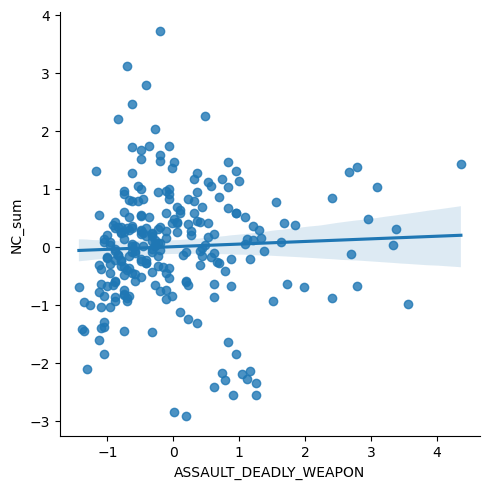

In [18]:
# Create a scatterplot for the "NC_sum" and "ASSAULT_DEADLY_WEAPON" columns 

sns.lmplot(x = 'ASSAULT_DEADLY_WEAPON', y = 'NC_sum', data = subN)

#### Virtually no correlation - the regression line is almost horizontal and there is high variance in the data points that fall far from the line

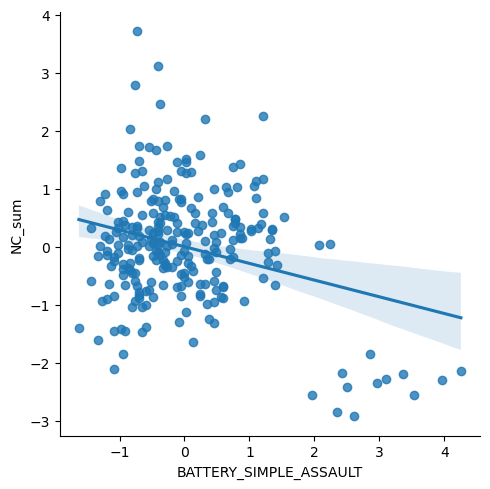

In [64]:
# Create a scatterplot for the "NC_sum" and "BATTERY_SIMPLE_ASSAULT" columns 

sns.lmplot(x = 'BATTERY_SIMPLE_ASSAULT', y = 'NC_sum', data = subN)

#### Despite the very slight negative correlation, the regression line doesn't fit the data points